In [15]:
import pandas as pd
import numpy as np


In [16]:
df = pd.read_csv("dataset/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
def check_data(df):
    shape = df.shape
    null = df.isnull().sum()
    duplicates = df.duplicated().sum()
#     print(f"Shape of the dataframe : Rows : {df.shape[0]} & Columns : {df.shape[1]}")
#     print(f"Null value in dataframe : \n{null}")
#     print(f"Duplicates in data : {duplicates}")
    return shape,null,duplicates

In [38]:
def preprocess_df(dataframe):
    shape = check_data(dataframe)[0]
    review_null_values = check_data(dataframe)[1][0]
    sentiment_null_values = check_data(dataframe)[1][1]
    duplicates = check_data(dataframe)[2]
    #since this dataframe has only duplicated value so I'm only removing duplicates
    if(duplicates !=0):
        dataframe.drop_duplicates(keep='first', inplace=True)
    return dataframe

In [39]:
df = preprocess_df(df)

In [41]:
df.duplicated().sum()

0

In [42]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [43]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [44]:
import re, nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def preprocess_text(review):
    text = re.sub(r'<br />', ' ', review.lower())
    stemmed_text = [porter.stem(word) for word in re.findall(r'\b[a-zA-Z]+\b', text) if word not in stop_words]
    processed_review = " ".join(stemmed_text)
    return processed_review

In [46]:
print(preprocess_text(df['review'][100]))


short film inspir soon full length featur spatula mad hilari piec contend similar cartoon yield multipl writer short film star edward spatula fire job join fight evil spoon premis allow funni content near begin bare present remaind featur film minut run time absorb odd ball comedi small music number unfortun much els lie plot set realli time show sure follow plot better mani high budget hollywood film film worth watch least time take expect deep stori


In [47]:
import time
start = time.time()
df['processed_review'] = df['review'].apply(preprocess_text)
end = time.time()
print(f"time taken to process the text :{(end-start):.2f} ")

time taken to process the text :300.76 


In [48]:
df.head()

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [49]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [50]:
# we can use LableEncoder as well 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['label'] = le.fit_transform(df['sentiment'])
# df['transformed_sentiment'] = df['sentiment'].map({'positive':1,'negative':0})


In [51]:
df.head()


,review,sentiment,processed_review,label
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# cv_vectorizer = CountVectorizer()

In [53]:
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])
# X_cv = cv_vectorizer.fit_transform(df['processed_review'])
y = df['label']

In [54]:
print(f"Shape of X using tfidf : {X_tfidf.shape}")
# print(f"Shape of X using bag of words : {X_cv.shape}")
print(f"Shape of y : {y.shape}")


Shape of X using tfidf : (49582, 68431)
Shape of y : (49582,)


In [55]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# cv_feature_names = cv_vectorizer.get_feature_names_out()
print(f"total length of feature extracted from review using tfidf : {len(tfidf_feature_names)}")
# print(f"total length of feature extracted from review using BOfW : {len(cv_feature_names)}")
print(f"Some of the features exracted by tfidf vectorizer : {tfidf_feature_names[10:20]}")
# print(f"Some of the features exracted by cv vectorizer : {cv_feature_names[10:20]}")

total length of feature extracted from review using tfidf : 68431
Some of the features exracted by tfidf vectorizer : ['aaaaarrrrrrgggggghhhhhh' 'aaaaatch' 'aaaaaw' 'aaaahhhhhh' 'aaaahhhhhhh'
 'aaaand' 'aaaarrgh' 'aaaawwwwww' 'aaaggghhhhhhh' 'aaagh']


In [56]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt



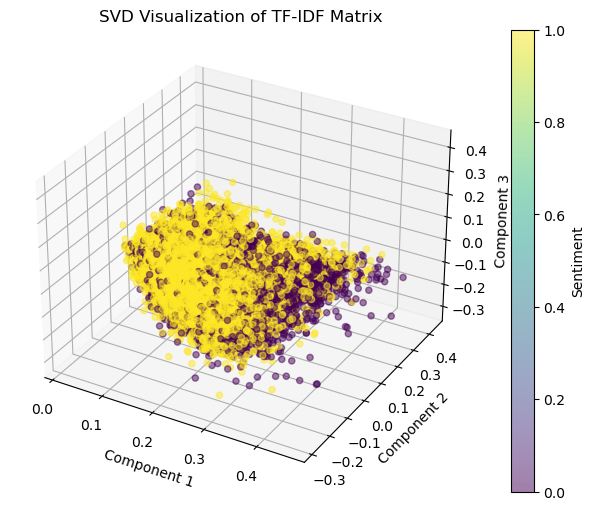

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Apply TruncatedSVD to reduce dimensionality to 3 components
svd = TruncatedSVD(n_components=3)
X_svd_3d = svd.fit_transform(X_tfidf)

# Plot the data points in the reduced 3D space
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_svd_3d[:, 0], X_svd_3d[:, 1], X_svd_3d[:,2], c=y, cmap='viridis', alpha=0.5)

# Set labels and title
ax.set_title('SVD Visualization of TF-IDF Matrix')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Add colorbar
plt.colorbar(scatter, ax=ax, label='Sentiment')

# Show the plot
plt.show()


In [58]:
from sklearn.decomposition import PCA
sample_indices = np.random.choice(X_tfidf.shape[0], size=1000, replace=False)
X_sampled = X_tfidf[sample_indices]

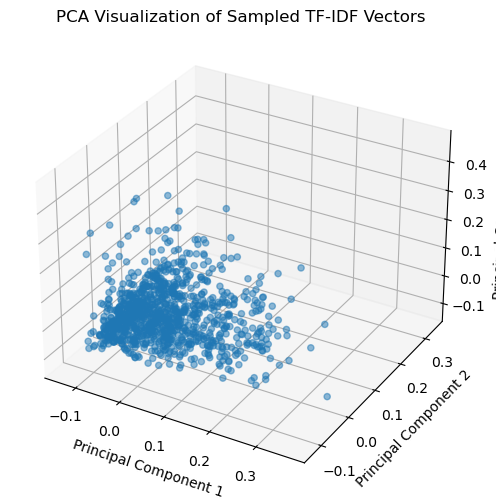

In [59]:

# Define the PCA object with 3 components
pca = PCA(n_components=3)

# Transform the sampled TF-IDF vectors into 3D space
X_sampled_pca = pca.fit_transform(X_sampled.toarray())

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D space
ax.scatter(X_sampled_pca[:, 0], X_sampled_pca[:, 1], X_sampled_pca[:, 2], alpha=0.5)

# Set labels and title
ax.set_title('PCA Visualization of Sampled TF-IDF Vectors')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2, random_state=42)
# X_cross_val, X_test, y_cross_val, y_test  = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [62]:
print("*"*100)
print(f"Shape of X train : {X_train.shape}")
print(f"Shape of y train : {y_train.shape}")
print("*"*100)
# print(f"Shape of X cross val : {X_cross_val.shape} ")
# print(f"Shape of y cross val : {y_cross_val.shape} ")
# print("*"*100)
print(f"Shape of X test : {X_test.shape}")
print(f"Shape of y test : {y_test.shape}")
print("*"*100)



****************************************************************************************************
Shape of X train : (39665, 68431)
Shape of y train : (39665,)
****************************************************************************************************
Shape of X test : (9917, 68431)
Shape of y test : (9917,)
****************************************************************************************************


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#importing all classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [64]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'MNB Bayes': MultinomialNB(),
    'BNB Bayes':BernoulliNB()
}


In [65]:
# Train classifiers
for name, classifier in classifiers.items():
    print(f"training {classifier}")
    start_time = time.time()
    classifier.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"{name} --- Trained in {training_time:.2f} seconds")
    print("-" * 100)


training LogisticRegression()
Logistic Regression --- Trained in 4.29 seconds
----------------------------------------------------------------------------------------------------
training MultinomialNB()
MNB Bayes --- Trained in 0.10 seconds
----------------------------------------------------------------------------------------------------
training BernoulliNB()
BNB Bayes --- Trained in 0.18 seconds
----------------------------------------------------------------------------------------------------


In [66]:
# Evaluate classifiers
results = {}
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

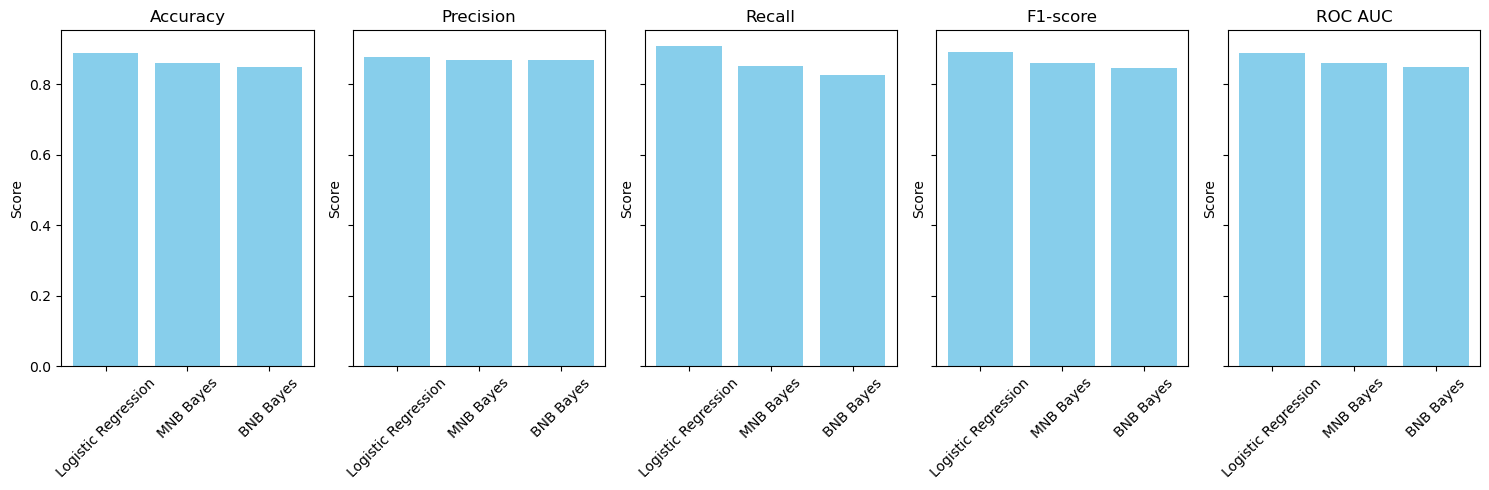

In [67]:
# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(15, 5), sharey=True)

# Plot each metric
for i, metric in enumerate(metrics):
    # Extract metric values for each classifier
    values = [result[metric] for result in results.values()]
    classifiers_names = list(results.keys())
    
    # Plot bar graph for the metric
    axes[i].bar(classifiers_names, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [68]:
# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.889886   0.877428  0.907393  0.892159  0.889817
MNB Bayes            0.860946   0.867770  0.852953  0.860298  0.860977
BNB Bayes            0.849450   0.868160  0.825432  0.846257  0.849545


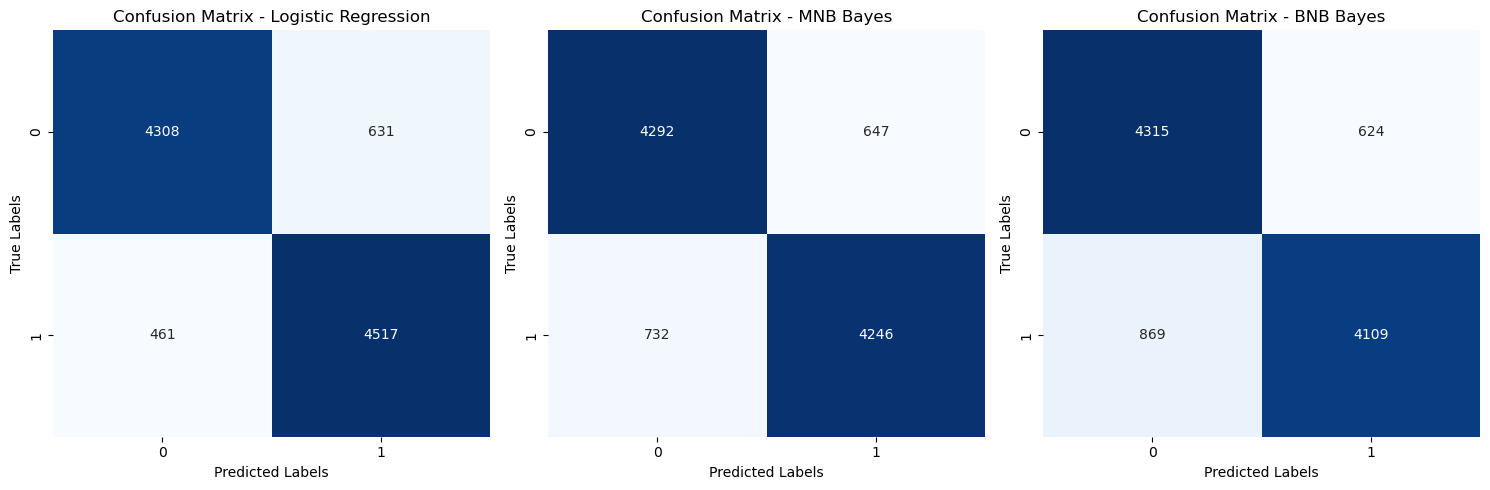

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(15, 5))

for i, (classifier_name, classifier) in enumerate(classifiers.items()):
    # Get the predictions of the classifier
    y_pred = classifier.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix on the i-th subplot
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {classifier_name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()




In [70]:
# !pip install pickle-mixin

In [72]:
import pickle, os

In [73]:
dumped_file_folder = os.path.join("..", "DumpedFile")

In [75]:
# Ensure that the DumpedFile folder exists
if not os.path.exists(dumped_file_folder):
    os.makedirs(dumped_file_folder)

In [83]:
model_file_path = os.path.join(dumped_file_folder, "trained_model.pkl")
final_selected_model = classifiers['Logistic Regression']
with open(model_file_path, 'wb') as file:
    pickle.dump(final_selected_model, file)

In [84]:
vectorizer_file_path = os.path.join(dumped_file_folder, "vectorizer.pkl")
with open(vectorizer_file_path, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [86]:
function_file_path = os.path.join(dumped_file_folder, "pre_process.pkl")
with open(function_file_path, 'wb') as file:
    pickle.dump(preprocess_text, file)

In [90]:
loaded_func = pickle.load(open(function_file_path,'rb'))
loaded_vectorizer = pickle.load(open(vectorizer_file_path,'rb'))
loaded_model = pickle.load(open(model_file_path,'rb'))

In [88]:
pred = loaded_model.predict(X_test)

In [89]:
print(accuracy_score(y_test,pred))

0.8898860542502773


In [91]:
def make_prediction(review):
    processed_review = loaded_func(review)
    vector = loaded_vectorizer.transform([processed_review])
    pred  = loaded_model.predict(vector)
    ans = "Positive" if (pred == 1) else "Negative"
    print(ans)

In [92]:
testing_review = """
The movie had a promising premise, but it failed to deliver. 
The acting was wooden, the plot was predictable, and the dialogue felt forced. 
Overall, it was a disappointing experience.
"""

In [94]:
make_prediction(testing_review)

Negative


In [ ]:
print(helllllo)

In [ ]:
# more_classifiers = {
#         'SVM': SVC(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
# }

In [ ]:
# Training another classifiers
# for name, classifier in more_classifiers.items():
#     print(f"training {classifier}")
#     start_time = time.time()
#     classifier.fit(X_train, y_train)
#     end_time = time.time()
#     training_time = (end_time - start_time)/60
#     print(f"{name} --- Trained in {training_time:.2f} seconds")
#     print("-" * 100)


In [ ]:
# Evaluate classifiers
# results = {}
# for name, classifier in more_classifiers.items():
#     y_pred = classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred)
#     results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

In [ ]:
# Convert results to DataFrame for easier visualization
# results_df = pd.DataFrame(results).T
# print("result without hyperparameter tuning : ")
# print(results_df)


In [ ]:
# Optionally, perform hyperparameter tuning
# tuned_classifiers = {}
# for name, classifier in more_classifiers.items():
#     if name == 'SVM':
#         # Define hyperparameters for SVM
#         param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
#         # Perform grid search
#         grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
#         grid_search.fit(X_train, y_train)
#         tuned_classifiers[name] = grid_search.best_estimator_
#     elif name == 'Random Forest':
#         # Define hyperparameters for Random Forest
#         param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
#         # Perform grid search
#         grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
#         grid_search.fit(X_train, y_train)
#         tuned_classifiers[name] = grid_search.best_estimator_
#     elif name == 'Gradient Boosting':
#         # Define hyperparameters for Gradient Boosting
#         param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
#         # Perform grid search
#         grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
#         grid_search.fit(X_train, y_train)
#         tuned_classifiers[name] = grid_search.best_estimator_

In [ ]:
# # Convert tuned results to DataFrame for easier visualization
# tuned_results_df = pd.DataFrame(tuned_results).T
# print("\nResults with Hyperparameter Tuning:")
# print(tuned_results_df)